## Import data from web

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/latest/last7days-by-modzcta.csv')
df

## Cleaning

In [126]:
df.rename(columns={'modzcta':'Zip_code','modzcta_name':'Neighborhood','percentpositivity_7day':'infection_rate','median_daily_test_rate	':'test_rate'},inplace=True)
df

,Zip_code,Neighborhood,infection_rate,people_tested,people_positive,median_daily_test_rate,adequately_tested,daterange
0,10001,Chelsea/NoMad/West Chelsea,3.72,1263,47,880.0,Yes,January 12-January 18
1,10002,Chinatown/Lower East Side,7.01,3239,227,714.3,Yes,January 12-January 18
2,10003,East Village/Gramercy/Greenwich Village,3.02,3441,104,1100.5,Yes,January 12-January 18
3,10004,Financial District,5.16,252,13,1110.3,Yes,January 12-January 18
4,10005,Financial District,0.58,346,2,662.3,Yes,January 12-January 18
5,10006,Financial District,2.44,164,4,680.1,Yes,January 12-January 18
6,10007,TriBeCa,2.84,457,13,1115.6,Yes,January 12-January 18
7,10009,Alphabet City/East Village/Stuyvesant Town-Coo...,4.25,2728,116,904.6,Yes,January 12-January 18
8,10010,Flatiron/Gramercy/Kips Bay,3.51,2138,75,1073.4,Yes,January 12-January 18
9,10011,Chelsea,3.95,2735,108,1085.5,Yes,January 12-January 18


In [127]:
df_data=pd.read_csv('ny.csv',index_col=False)
df_data.head()

,Zip;City;State;Latitude;Longitude;Timezone;Daylight savings time flag;geopoint
0,13224;Syracuse;NY;43.041866;-76.1032;-5;1;43.0...
1,13782;Hamden;NY;42.18942;-74.99219;-5;1;42.18942
2,12144;Rensselaer;NY;42.63738;-73.72587;-5;1;42...
3,11555;Uniondale;NY;40.754757;-73.601772;-5;1;4...
4,11558;Island Park;NY;40.603159;-73.65515;-5;1;...


In [128]:
list1=[]
for item in df_data['Zip;City;State;Latitude;Longitude;Timezone;Daylight savings time flag;geopoint']:
    list1.append(item.split(';'))

In [129]:
df_coordinate=pd.DataFrame(list1)
df_coordinate.head()

,0,1,2,3,4,5,6,7
0,13224,Syracuse,NY,43.041866,-76.1032,-5,1,43.041866
1,13782,Hamden,NY,42.18942,-74.99219,-5,1,42.18942
2,12144,Rensselaer,NY,42.63738,-73.72587,-5,1,42.63738
3,11555,Uniondale,NY,40.754757,-73.601772,-5,1,40.754757
4,11558,Island Park,NY,40.603159,-73.65515,-5,1,40.603159


In [130]:
df_coordinate.columns=['Zip_code','Neighborhood','State','Latitude','Longitude',1,2,3]
df_coordinate.drop([1,2,3],axis=1,inplace=True)

In [131]:
df_coordinate=df_coordinate.astype({'Zip_code':int})
df_coordinate.dtypes

Zip_code         int64
Neighborhood    object
State           object
Latitude        object
Longitude       object
dtype: object

In [132]:
df=df.merge(df_coordinate, on='Zip_code', how='left')
df.dropna(inplace=True)
df.shape

(174, 12)

In [133]:
df.head()

,Zip_code,Neighborhood_x,infection_rate,people_tested,people_positive,median_daily_test_rate,adequately_tested,daterange,Neighborhood_y,State,Latitude,Longitude
0,10001,Chelsea/NoMad/West Chelsea,3.72,1263,47,880.0,Yes,January 12-January 18,New York,NY,40.750742,-73.99653
1,10002,Chinatown/Lower East Side,7.01,3239,227,714.3,Yes,January 12-January 18,New York,NY,40.71704,-73.987
2,10003,East Village/Gramercy/Greenwich Village,3.02,3441,104,1100.5,Yes,January 12-January 18,New York,NY,40.732509,-73.98935
4,10005,Financial District,0.58,346,2,662.3,Yes,January 12-January 18,New York,NY,40.706019,-74.00858
5,10006,Financial District,2.44,164,4,680.1,Yes,January 12-January 18,New York,NY,40.707904,-74.01342


In [134]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
CLIENT_ID = '333Z14P1WLW2VUZFQENZSKRKKQAELPQBQSMFLDFJPTYOGK2Z' # your Foursquare ID
CLIENT_SECRET = 'M3HOBBLUC0B3CSV1C3DEVLDAGZ0TK1CFEV5MQ1Q5024APNBZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius=500 
venuelist=[]

for neighborhood_name,lat,lng in zip(df['Neighborhood_x'],df['Latitude'],df['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for item in results:
        venuelist.append([neighborhood_name,lat,lng,item['venue']['name'],item['venue']['location']['lat'],item['venue']['location']['lng'],item['venue']['categories'][0]['name']])
venuelist

KeyError: 'groups'

In [ ]:
df_venue=pd.DataFrame(venuelist)
df_venue

In [135]:
df_list=pd.get_dummies(df_venue[[6]])
df_list['Neighborhood_x']=df_venue[0]
df_list1=df_list.groupby('Neighborhood_x').mean()
df_list1

,6_Accessories Store,6_Acupuncturist,6_Adult Boutique,6_Afghan Restaurant,6_African Restaurant,6_Airport Terminal,6_Airport Tram,6_American Restaurant,6_Animal Shelter,6_Antique Shop,...,6_Warehouse Store,6_Waste Facility,6_Waterfront,6_Weight Loss Center,6_Whisky Bar,6_Wine Bar,6_Wine Shop,6_Wings Joint,6_Women's Store,6_Yoga Studio
Neighborhood_x,,,,,,,,,,,,,,,,,,,,,
Airport/East Elmhurst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Airport/South Jamaica/Springfield Gardens/St. Albans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Allerton/Baychester/Pelham Gardens/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Allerton/Norwood/Pelham Parkway/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alphabet City/East Village/Stuyvesant Town-Cooper Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.020000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.030000,0.020000,0.000000,0.000000,0.000000
Annadale/Rossville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.076923,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arrochar/Midland Beach/Shore Acres/South Beach Ocean Breeze,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arverne/Broad Channel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arverne/Edgemere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000


In [136]:
df_list1.loc['Airport/East Elmhurst'].sort_values(ascending=False)

6_Donut Shop                                  0.111111
6_Pharmacy                                    0.111111
6_Caribbean Restaurant                        0.111111
6_Fried Chicken Joint                         0.111111
6_Diner                                       0.111111
6_Ice Cream Shop                              0.111111
6_Video Store                                 0.111111
6_Pizza Place                                 0.111111
6_Flower Shop                                 0.111111
6_Park                                        0.000000
6_Peruvian Restaurant                         0.000000
6_Persian Restaurant                          0.000000
6_Performing Arts Venue                       0.000000
6_Peking Duck Restaurant                      0.000000
6_Pedestrian Plaza                            0.000000
6_Pawn Shop                                   0.000000
6_Accessories Store                           0.000000
6_Paper / Office Supplies Store               0.000000
6_Pet Serv

In [137]:
cols=[]
for col in df_list1.columns:
    if 'Shop' in col or 'Store' in col or 'Restaurant' in col or 'Gym' in col or 'Bar' in col :
        cols.append(col)
df_final=df_list1[cols]

In [138]:
df_final=df_final.merge(df[['infection_rate','Neighborhood_x','Latitude','Longitude']],on='Neighborhood_x')
df_final

,Neighborhood_x,6_Accessories Store,6_Afghan Restaurant,6_African Restaurant,6_American Restaurant,6_Antique Shop,6_Arepa Restaurant,6_Argentinian Restaurant,6_Arts & Crafts Store,6_Asian Restaurant,...,6_Video Store,6_Vietnamese Restaurant,6_Warehouse Store,6_Whisky Bar,6_Wine Bar,6_Wine Shop,6_Women's Store,infection_rate,Latitude,Longitude
0,Airport/East Elmhurst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.44,40.762854,-73.87051
1,Airport/South Jamaica/Springfield Gardens/St. ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.63,40.674888,-73.7727
2,Allerton/Baychester/Pelham Gardens/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.99,40.868643,-73.84735
3,Allerton/Norwood/Pelham Parkway/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.97,40.872265,-73.86937
4,Alphabet City/East Village/Stuyvesant Town-Coo...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.010000,...,0.000000,0.010000,0.000000,0.000000,0.030000,0.020000,0.000000,4.25,40.727092999999996,-73.97864
5,Annadale/Rossville,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.72,40.543117,-74.17628
6,Arrochar/Midland Beach/Shore Acres/South Beach...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.92,40.599021,-74.07503
7,Arverne/Broad Channel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.18,40.596959,-73.81978
8,Arverne/Edgemere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,9.34,40.592939,-73.79568
9,Astoria (North),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,6.41,40.771286,-73.92462


In [139]:
pd.set_option('display.max_rows',500)
df_final

,Neighborhood_x,6_Accessories Store,6_Afghan Restaurant,6_African Restaurant,6_American Restaurant,6_Antique Shop,6_Arepa Restaurant,6_Argentinian Restaurant,6_Arts & Crafts Store,6_Asian Restaurant,...,6_Video Store,6_Vietnamese Restaurant,6_Warehouse Store,6_Whisky Bar,6_Wine Bar,6_Wine Shop,6_Women's Store,infection_rate,Latitude,Longitude
0,Airport/East Elmhurst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.44,40.762854,-73.87051
1,Airport/South Jamaica/Springfield Gardens/St. ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.63,40.674888,-73.7727
2,Allerton/Baychester/Pelham Gardens/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.99,40.868643,-73.84735
3,Allerton/Norwood/Pelham Parkway/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.97,40.872265,-73.86937
4,Alphabet City/East Village/Stuyvesant Town-Coo...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.010000,...,0.000000,0.010000,0.000000,0.000000,0.030000,0.020000,0.000000,4.25,40.727092999999996,-73.97864
5,Annadale/Rossville,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.72,40.543117,-74.17628
6,Arrochar/Midland Beach/Shore Acres/South Beach...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.92,40.599021,-74.07503
7,Arverne/Broad Channel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.18,40.596959,-73.81978
8,Arverne/Edgemere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,9.34,40.592939,-73.79568
9,Astoria (North),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,6.41,40.771286,-73.92462


In [140]:
from sklearn.cluster import KMeans

In [141]:
k_clusters=5
clustering=df_final.drop(['infection_rate','Neighborhood_x'],axis=1)
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(clustering)
kmeans.labels_[0:10] 

array([0, 0, 3, 3, 1, 4, 4, 2, 0, 1], dtype=int32)

In [142]:
df_final['label']=kmeans.labels_
df_final

,Neighborhood_x,6_Accessories Store,6_Afghan Restaurant,6_African Restaurant,6_American Restaurant,6_Antique Shop,6_Arepa Restaurant,6_Argentinian Restaurant,6_Arts & Crafts Store,6_Asian Restaurant,...,6_Vietnamese Restaurant,6_Warehouse Store,6_Whisky Bar,6_Wine Bar,6_Wine Shop,6_Women's Store,infection_rate,Latitude,Longitude,label
0,Airport/East Elmhurst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.44,40.762854,-73.87051,0
1,Airport/South Jamaica/Springfield Gardens/St. ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.63,40.674888,-73.7727,0
2,Allerton/Baychester/Pelham Gardens/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.99,40.868643,-73.84735,3
3,Allerton/Norwood/Pelham Parkway/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.97,40.872265,-73.86937,3
4,Alphabet City/East Village/Stuyvesant Town-Coo...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.010000,...,0.010000,0.000000,0.000000,0.030000,0.020000,0.000000,4.25,40.727092999999996,-73.97864,1
5,Annadale/Rossville,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.72,40.543117,-74.17628,4
6,Arrochar/Midland Beach/Shore Acres/South Beach...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.92,40.599021,-74.07503,4
7,Arverne/Broad Channel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.18,40.596959,-73.81978,2
8,Arverne/Edgemere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,9.34,40.592939,-73.79568,0
9,Astoria (North),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,6.41,40.771286,-73.92462,1


## Visualize cluster-labeled neighborhoods in a map

In [143]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
# create map
latitude=40.7
longitude=-73.9
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood_x'], df_final['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Bar chart of infection rates

<AxesSubplot:xlabel='Neighborhood_x'>

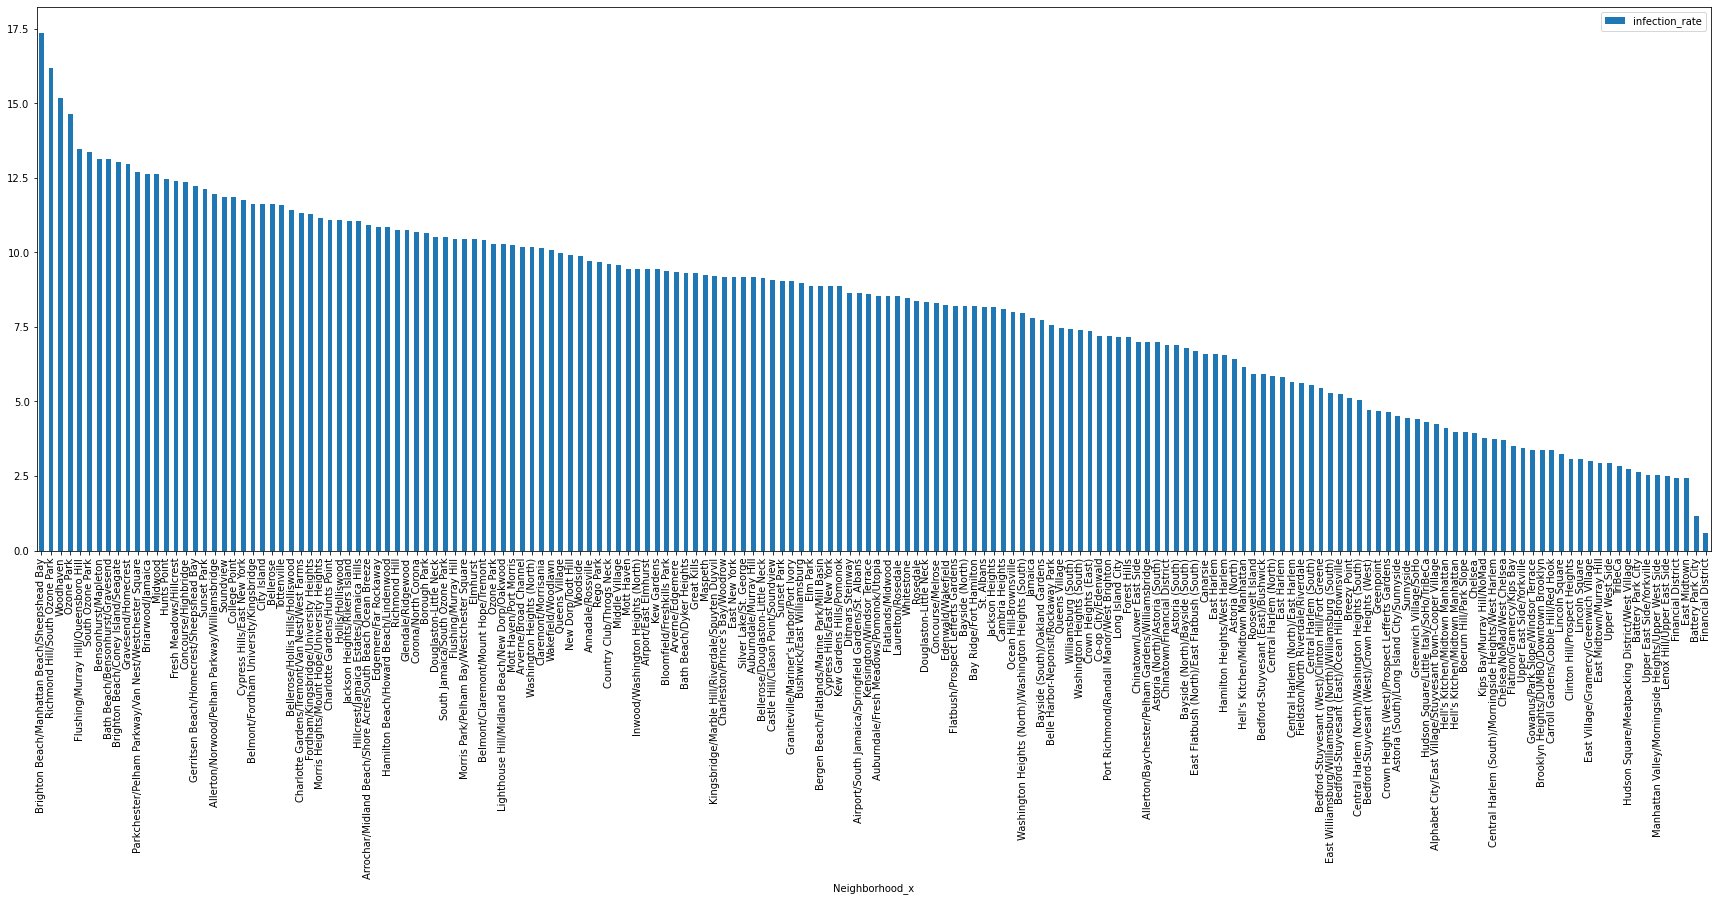

In [150]:
import matplotlib as plt
df_plot=df_final[['Neighborhood_x','infection_rate']]
df_plot=df_plot.sort_values(by='infection_rate',ascending=False)
df_plot.set_index('Neighborhood_x',inplace=True)
df_plot.plot(kind='bar',figsize=(30,10),rot=90)

# Histogram 

## Adding the frequency of restaurants, shops and gyms in a neighborhood and incorporating the information into the data frame

In [184]:
df_reg=df_final
list_freq=[]
rest=[]
gym=[]
store=[]
for row in range(df_reg.shape[0]):
    rest_sum=0
    gym_sum=0
    store_sum=0
    for col in df_reg.columns:
        if 'Restaurant' in col or 'Bar' in col:
            rest_sum+=df_reg.loc[row,col]
        if 'Gym' in col:
            gym_sum+=df_reg.loc[row,col]
        if 'Store' in col or 'Shop' in col:
            store_sum+=df_reg.loc[row,col]        
    rest.append(rest_sum)
    gym.append(gym_sum)
    store.append(store_sum)

In [185]:
df_reg['total_restaurant']=rest
df_reg['total_gym']=gym
df_reg['total_store']=store


In [186]:
min1=min(df_reg['infection_rate'].tolist())
max1=max(df_reg['infection_rate'].tolist())
bins=np.linspace(min1,max1,4)
names=['low','medium','high']
df_reg['rate_binned']=pd.cut(df_reg['infection_rate'],bins,labels=names,include_lowest=True)
df_reg

,Neighborhood_x,6_Accessories Store,6_Afghan Restaurant,6_African Restaurant,6_American Restaurant,6_Antique Shop,6_Arepa Restaurant,6_Argentinian Restaurant,6_Arts & Crafts Store,6_Asian Restaurant,...,6_Wine Shop,6_Women's Store,infection_rate,Latitude,Longitude,label,total_restaurant,total_gym,total_store,rate_binned
0,Airport/East Elmhurst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.44,40.762854,-73.87051,0,0.111111,0.000000,0.444444,medium
1,Airport/South Jamaica/Springfield Gardens/St. ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.63,40.674888,-73.7727,0,0.333333,0.000000,0.133333,medium
2,Allerton/Baychester/Pelham Gardens/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.99,40.868643,-73.84735,3,0.166667,0.000000,0.166667,medium
3,Allerton/Norwood/Pelham Parkway/Williamsbridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,11.97,40.872265,-73.86937,3,0.250000,0.083333,0.166667,high
4,Alphabet City/East Village/Stuyvesant Town-Coo...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.010000,...,0.020000,0.000000,4.25,40.727092999999996,-73.97864,1,0.560000,0.020000,0.170000,low
5,Annadale/Rossville,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.72,40.543117,-74.17628,4,0.307692,0.000000,0.000000,medium
6,Arrochar/Midland Beach/Shore Acres/South Beach...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.92,40.599021,-74.07503,4,0.150000,0.000000,0.250000,medium
7,Arverne/Broad Channel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.18,40.596959,-73.81978,2,0.250000,0.000000,0.500000,medium
8,Arverne/Edgemere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045455,0.000000,9.34,40.592939,-73.79568,0,0.090909,0.000000,0.181818,medium
9,Astoria (North),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021277,0.000000,6.41,40.771286,-73.92462,1,0.340426,0.000000,0.191489,medium


array([[<AxesSubplot:title={'center':'infection_rate'}>]], dtype=object)

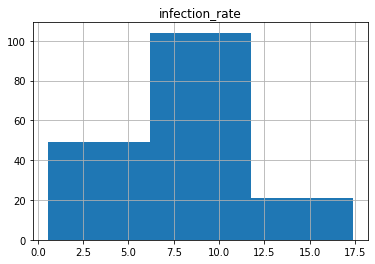

In [187]:
df_reg[['infection_rate']].hist(bins=3)

## Use classification to determine the level of infection rate in different neighborhoods

In [188]:
from sklearn import preprocessing
X=df_reg[['total_restaurant','total_gym','total_store']]
X =preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y=df_reg['rate_binned']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat

array(['medium', 'low', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'high',
       'low', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium',
       'medium', 'high', 'low', 'medium', 'low'], dtype=object)

In [189]:
#jaccard_similarity_score 
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.762589928057554
Test set Accuracy:  0.6285714285714286


## Find the best K value

In [193]:
score_list=[]
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    score=metrics.accuracy_score(y_test, yhat)
    score_list.append(score)
score_list

[0.6857142857142857,
 0.5142857142857142,
 0.6285714285714286,
 0.6285714285714286,
 0.6,
 0.6285714285714286,
 0.6571428571428571,
 0.6571428571428571,
 0.6,
 0.6]

In [194]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)
metrics.accuracy_score(yhat1,y_test)

0.6571428571428571